In [111]:
import numpy as np
import os
from keras.utils import Sequence

# Here, `x_set` is list of path to the images
# and `y_set` are the associated classes.

class HCLSequence(Sequence):
    CHAR_PER_FILE = 3755 # hh and xx files
    #CHAR_PER_FILE = 1000 # ch files

    def __init__(self, file_path, batch_size):
        self.file_list=[x for x in sorted(os.listdir(file_path)) if "hh" in x]
        self.batch_size = batch_size
        self.path = file_path

    def __len__(self):
        return int(np.ceil(len(self.file_list)*CHAR_PER_FILE / float(self.batch_size)))

    def read_at_offset(self,filename,offset, read_count):
        X=[]
        file_to_open= "{}/{}".format(self.path,filename)
        with open(file_to_open, "rb") as f:
            meta = f.read(512) # read first block, it is meta data
            s= np.zeros((64,64))
            f.seek(512*(offset+1))
            for c in range(read_count):
                sx = f.read(512)
                # Do stuff with byte.
                for i in range(64):
                    for k in range(8):
                        dat=sx[i*8+k]
                        for j in reversed(range(8)):
                            s[i][k*8+7-j]=(dat >> j)&0x01
                X.append(np.copy(s))
        return X
    def __getitem__(self, idx):
        X=[]
        offset=(idx*self.batch_size) % self.CHAR_PER_FILE
        fid=idx*self.batch_size//self.CHAR_PER_FILE
        print(offset,fid, self.file_list[fid])

        if self.CHAR_PER_FILE - offset < self.batch_size: #need read next file 
            X+=self.read_at_offset(self.file_list[fid], offset, self.CHAR_PER_FILE - offset ) # read till the end

            X+=self.read_at_offset(self.file_list[fid+1], 0, self.batch_size-self.CHAR_PER_FILE + offset) # read the left char from next file
        else:
            X+=self.read_at_offset(self.file_list[fid], offset, self.batch_size)

        
        #batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        #batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]

        return np.array(X)

In [112]:
myGen=HCLSequence('OCR', 128)

In [113]:
myGen.__getitem__(30)

85 1 hh002.hcl


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl
0 0 hh001.hcl


ValueError: num must be 1 <= num <= 32, not 33

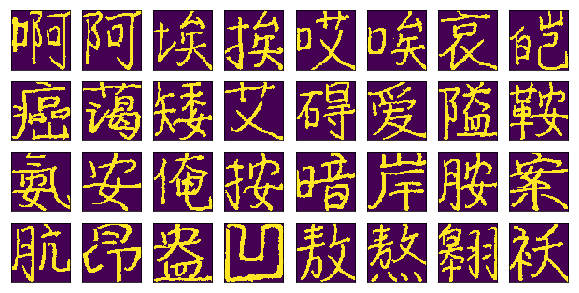

In [121]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
for i in range(128):
    im= myGen.__getitem__(0)[i]
    ax = fig.add_subplot(4, 8, 1 + i, xticks=[], yticks=[])
    plt.imshow(im)
plt.show()

In [ ]:
for img in HCLSequence('OCR', 128)
plt.imshow(x)